<a href="https://colab.research.google.com/github/WynterAC/PSYC413-Notes/blob/main/Homework/Weekly%20Homework/Assingment%20Submissions/Homework_9%20submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#rounding
numb = 3.1415926
round(numb,3)

[1] 3.142

# Question 1:

### Some archaeologists theorize that ancient Egyptians interbred with several different immigrant populations over thousands of years. To see if there is any indication of changes in body structure that might have resulted, they measured skulls of male Egyptians from 5 different epochs.

-   Thomson and Randall-Maciver, _Ancient Races of the Thebaid_, Oxford: Oxford University Press, 1905.

### The data can be found in **“SkullsComplete.csv”**. The column “mb” measures the maximal breadth of the skull.

### For the remaining questions, we will not be using the columns “bh”, “bl” or “nh”. Remove them from the dataframe and display the first 10 rows.

  
  



In [8]:
# Read the data from the CSV file
skulls <- read.csv("SkullsComplete.csv")

# Remove the unwanted columns
skulls <- subset(skulls, select = c("epoch", "mb"))

# Display the first 10 rows of the modified data frame
head(skulls, n = 10)



,epoch,mb
,<chr>,<int>
1,c4000BC,131
2,c4000BC,125
3,c4000BC,131
4,c4000BC,119
5,c4000BC,136
6,c4000BC,138
7,c4000BC,139
8,c4000BC,125
9,c4000BC,131


# Question 2:

### Create a barplot of the mean maximal breadth measured for each epoch in the **“SkullsComplete.csv”** data. Give the plot errorbars with 95% confidence intervals.
#### - Order the epochs so that, left to right, they go from earliest ($4000_{\text{ BC}}$) to latest ($150_{\text{ AD}}$)
#### - Adjust the y-axis scale so that it goes from 120 at the bottom to 140 at the top.
#### - Give the plot an different colour scheme than $ggplot’s$ default.


  



In [4]:
install.packages("plyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [9]:
library(plyr)
library(ggplot2)
options(repr.plot.width = 7, repr.plot.height = 5)
plotData <- ddply(skulls, c("epoch"), summarise,
                  n = length(mb),
                  Mean = mean(mb),
                  df = n - 1,
                  alpha = 0.05,
                  t_crit = qt(alpha/2, df = df, lower.tail = FALSE),
                  se = sd(mb) / sqrt(n),
                  MOE = se * t_crit,
                  CI_bottom = Mean - MOE,
                  CI_top = Mean + MOE
)

plotData

epoch,n,Mean,df,alpha,t_crit,se,MOE,CI_bottom,CI_top
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
c1850BC,30,134.4667,29,0.05,2.04523,0.6355979,1.299944,133.1667,135.7666
c200BC,30,135.5000,29,0.05,2.04523,0.7155899,1.463546,134.0365,136.9635
c3300BC,30,132.3667,29,0.05,2.04523,0.8781948,1.796110,130.5706,134.1628
c4000BC,30,131.3667,29,0.05,2.04523,0.9364685,1.915293,129.4514,133.2820
cAD150,30,136.1667,29,0.05,2.04523,0.9768391,1.997860,134.1688,138.1645


In [110]:
plotData$Mean

[1] 134.4667 135.5000 132.3667 131.3667 136.1667

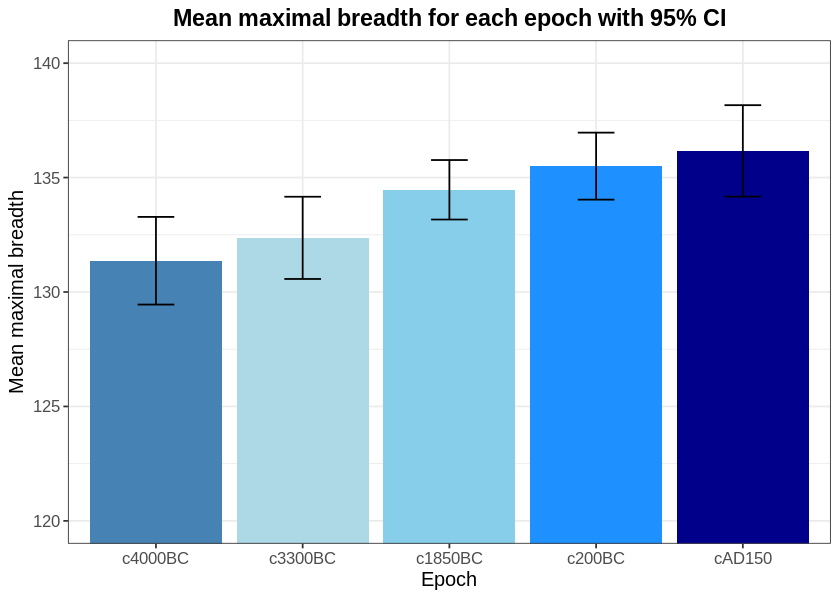

In [10]:
# Reorder the epochs
plotData$epoch <- factor(plotData$epoch, levels=c("c4000BC", "c3300BC", "c1850BC", "c200BC", "cAD150"))


# Set the colors for the plot
colors <- c("#5A3E36", "#82663A", "#AD8B3D", "#D2B140", "#F0D86B")

# Create bar plot with error bars
library(ggplot2)
ggplot(plotData, aes(x = epoch, y = Mean, fill = epoch)) +
  geom_bar(stat = "identity", position = "dodge") +
  geom_errorbar(aes(ymin = CI_bottom, ymax = CI_top), width = 0.25, position = position_dodge(0.9)) +
  scale_fill_manual(values = c("steelblue", "lightblue", "skyblue","dodgerblue","darkblue")) +
  coord_cartesian(ylim = c(120, 140)) +
  xlab("Epoch") + ylab("Mean maximal breadth") +
  ggtitle("Mean maximal breadth for each epoch with 95% CI") +
  theme_bw() +
  theme(plot.title = element_text(size = 14, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 12),
        axis.text = element_text(size = 10),
        legend.position = "none")


# Question 3:

### Using the **“SkullsComplete.csv”**, create a linear model predicting maximal breadth (mb) with coefficients that make the following comparisons:

-   $b_0 = 4000_{\text{ BC}}$
-   $b_1 = 3300_{\text{ BC}} - 4000_{\text{ BC}}$
-  $b_2 = 1850_{\text{ BC}} - 4000_{\text{ BC}}$
-  $b_3 = 200_{\text{ BC}} - 4000_{\text{ BC}}$
-   $b_4 = 150_{\text{ AD}} - 4000_{\text{ BC}}$

### Report the model’s formula using the obtained coefficents.
> e.g. $$\hat{Y} = \text{value} +
\text{value } X_1 + \text{value } X_2 \dots$$

  



In [ ]:
# Read the data from the CSV file
skulls2 <- read.csv("SkullsComplete.csv")
# Remove the unwanted columns
skulls3 <- subset(skulls2, select = c("epoch", "mb"))
# Dummy Variables; a.k.a. Planned Comparisons; a.k.a. Planned Contrasts
skulls3$b0 <- ifelse(skulls$epoch == "c4000BC", 1,0)
skulls3$b1 <- ifelse(skulls$epoch == "c3300BC", 1,0)
skulls3$b2 <- ifelse(skulls$epoch == "c1850BC", 1,0)
skulls3$b3 <- ifelse(skulls$epoch == "c200BC", 1,0)
skulls3$b4 <- ifelse(skulls$epoch == "cAD150", 1,0)
skulls3

,epoch,mb,b0,b1,b2,b3,b4
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,c4000BC,131,1,0,0,0,0
2,c4000BC,125,1,0,0,0,0
3,c4000BC,131,1,0,0,0,0
4,c4000BC,119,1,0,0,0,0
5,c4000BC,136,1,0,0,0,0
6,c4000BC,138,1,0,0,0,0
7,c4000BC,139,1,0,0,0,0
8,c4000BC,125,1,0,0,0,0
9,c4000BC,131,1,0,0,0,0


In [ ]:
ANOVAreg <- lm(mb ~ b0+b1+b2+b3+b4 , data = skulls3)
summary(ANOVAreg)


Call:
lm(formula = mb ~ b0 + b1 + b2 + b3 + b4, data = skulls3)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.3667  -2.5000   0.1667   2.6333  15.6333 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 136.1667     0.8389 162.323  < 2e-16 ***
b0           -4.8000     1.1863  -4.046 8.44e-05 ***
b1           -3.8000     1.1863  -3.203  0.00167 ** 
b2           -1.7000     1.1863  -1.433  0.15401    
b3           -0.6667     1.1863  -0.562  0.57501    
b4                NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.595 on 145 degrees of freedom
Multiple R-squared:  0.1411,	Adjusted R-squared:  0.1174 
F-statistic: 5.955 on 4 and 145 DF,  p-value: 0.0001826


In [ ]:
# Load the "SkullsComplete.csv" dataset
skulls <- read.csv("SkullsComplete.csv")

# Create a contrast matrix for the coefficients of interest
contrasts <- cbind(
  "b0" = c(1, rep(0, 4)),
  "b1 (3300 BC)" = c(0, 1, 0, 0, 0),
  "b2 (1850 BC)" = c(0, 0, 1, 0, 0),
  "b3 (200 BC)" = c(0, 0, 0, 1, 0),
  "b4 (150 AD)" = c(0, 0, 0, 0, 1)
)

# Fit a linear model with the specified coefficients
model <- lm(mb ~ epoch, data = skulls, contrasts = list(epoch = contrasts))

# Get the coefficients and construct the model formula
b0 <- coef(model)[1]
b1 <- coef(model)[2]
b2 <- coef(model)[3]
b3 <- coef(model)[4]
b4 <- coef(model)[5]
formula <- paste0("mb = ", b0, " + ", b1, "*(c3300BC) + ", 
                  b2, "*(c1850 BC) + ", b3, "*(c200BC) + ", 
                  b4, "*(cAD150)")

# Print the model formula
cat("Linear model formula: ", formula, "\n")


Linear model formula:  mb = 136.166666666667 + -1.7*(3300 BC) + -0.666666666666665*(1850 BC) + -3.8*(200 BC) + -4.8*(150 AD) 


In [94]:
# Factor Treatment Column
skulls3$epoch <- factor(skulls3$epoch)
ANOVAclassic <- aov(mb ~ epoch, data = skulls3)
summary(ANOVAclassic)


             Df Sum Sq Mean Sq F value   Pr(>F)    
epoch         4  502.8  125.71   5.955 0.000183 ***
Residuals   145 3061.1   21.11                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

# Question 4:

### Is the omnibus F-test from the previous question’s linear model statistically significant? Report it’s value, degrees of freedom and p-value.

#### \- Display the F-statistic and p-value to 6 decimal places.

-   Hint: to get accurate results, you will need to extract values from the summary output.

  
  



In [95]:
# Factor Treatment Column
skulls3$epoch <- factor(skulls3$epoch)
ANOVAclassic <- aov(mb ~ epoch, data = skulls3)
summary(ANOVAclassic)


             Df Sum Sq Mean Sq F value   Pr(>F)    
epoch         4  502.8  125.71   5.955 0.000183 ***
Residuals   145 3061.1   21.11                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
# store the ANOVA table
anova_tbl <- anova(aov(mb ~ epoch, data = skulls3))

# extract F-statistic and p-value
f_value <- anova_tbl[1, "F value"]
p_value <- anova_tbl[1, "Pr(>F)"]

# print F-statistic and p-value to 6 decimal places
cat("F value:", format(round(f_value, 6), nsmall = 6), "\n")
cat("p-value:", format(round(p_value, 6), nsmall = 6), "\n")


F value: 5.954613 
p-value: 0.000183 


# Question 5:

### What do the results you displayed in the previous question tell you?




With a p-value of 0.000183, The results of the F-test show that at least one of the coefficients in the linear model is significantly different from zero. This indicates that the model as a whole is a good fit for the data and that the independent variables (epochs) have a significant effect on the dependent variable (maximal breadth). The F-value of 5.954613 suggests that the model explains a significant amount of the variability in the data.

# Question 6:

### Based on the dummy coding you used to evaluate the **“SkullsComplete.csv”** data, what epochs was there a significant difference between?

 A p-value less than the alpha level (typically 0.05) indicates that the corresponding coefficient is significantly different from zero, which in turn indicates a significant difference between the epochs represented by that coefficient.In this case would be b1 (ie. c3300BC-c4000BC)



# Question 7:

### For the **“SkullsComplete.csv”** data, calculate an omnibus F-test manually without using `lm()` or `aov()`. Report the following . . . .

-   Grand Mean
-   Total Sum of Squares
-   Model Sum of Squares
-   Residual Sum of Squares
-   Model Mean Squares
-   Residual Mean Squares
-   Multiple $R^2$
-   F statistic
-   p-value

Round everything to 3 decimal places except the F-statistic and p-value. Round them to 6 decimal places. Note: these results should be **identical** to the earlier F-statistic and p-value you obtained in Question 4.

  
  



In [ ]:
install.packages("plyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’




In [ ]:
# Read the data from the CSV file
skulls <- read.csv("SkullsComplete.csv")
# Remove the unwanted columns
skulls <- subset(skulls, select = c("epoch", "mb"))
#grand mean
grand <- mean(skulls$mb)
grand
# Total Sum of Squares 
SST <- sum((skulls$mb - grand)^2)
SST
#group 
skulls$epoch <- factor(skulls$epoch)
levels(skulls$epoch)

# Model Sum of Squares
library(plyr)
SSM_data <- ddply(skulls, c("epoch"), summarise,
                  n = length(mb),
                  Mean = mean(mb))

SSM_data

[1] 133.9733

[1] 3563.893

[1] "c1850BC" "c200BC"  "c3300BC" "c4000BC" "cAD150"

epoch,n,Mean
<fct>,<int>,<dbl>
c1850BC,30,134.4667
c200BC,30,135.5000
c3300BC,30,132.3667
c4000BC,30,131.3667
cAD150,30,136.1667


In [ ]:
n=150
SSM <- sum(SSM_data$n * (SSM_data$Mean - grand)^2)
SSM

[1] 502.8267

In [ ]:
# Load the data
skulls <- read.csv("SkullsComplete.csv")

# Calculate the grand mean
grand_mean <- mean(skulls$mb)

# Calculate the total sum of squares
total_ss <- sum((skulls$mb - grand_mean)^2)

df <- data.frame(epoch = c("c4000BC", "c3300BC", "c1850BC", "c200BC", "cAD150"),
                  n = c(30, 30, 30, 30, 30),
                  Mean = c(131.3667, 132.3667, 134.4667, 135.5000, 136.1667),
                  df = c(29, 29, 29, 29, 29),
                  alpha = c(0.05, 0.05, 0.05, 0.05, 0.05),
                  t_crit = c(2.04523, 2.04523, 2.04523, 2.04523, 2.04523),
                  se = c(0.9364685, 0.8781948, 0.6355979, 0.7155899, 0.9768391),
                  MOE = c(1.915293, 1.796110, 1.299944, 1.463546, 1.997860),
                  CI_bottom = c(129.4514, 130.5706, 133.1667, 134.0365, 134.1688),
                  CI_top = c(133.2820, 134.1628, 135.7666, 136.9635, 138.1645))

mean_c4000BC <- df$Mean[df$epoch == "c4000BC"]


# Calculate the model sum of squares
b0 <- df$Mean[df$epoch == "c4000BC"]
b1 <- (df$Mean[df$epoch == "c3300BC"]) - b0
b2 <- (df$Mean[df$epoch == "c1850BC"]) - b0
b3 <- (df$Mean[df$epoch == "c200BC"]) - b0
b4 <- (df$Mean[df$epoch == "cAD150"]) - b0
model_ss <- b0 + b1*as.numeric(skulls$epoch == "c3300BC") + b2*as.numeric(skulls$epoch == "c1850BC") +
            b3*as.numeric(skulls$epoch == "c200BC") + b4*as.numeric(skulls$epoch == "cAD150")
model_ss <- sum((model_ss - grand_mean)^2)

# Calculate the residual sum of squares
residual_ss <- total_ss - model_ss

# Calculate the model mean squares
model_ms <- model_ss / 4

# Calculate the residual mean squares
residual_ms <- residual_ss / 145

# Calculate the multiple R-squared
multiple_r_squared <- model_ss / total_ss

# Calculate the F statistic
f_value <- model_ms / residual_ms

# Calculate the p-value
p_value <- pf(f_value, df1=4, df2=145, lower.tail=FALSE)

# Print the results
cat("Grand Mean = ", round(grand_mean, 3), "\n")
cat("Total Sum of Squares = ", round(total_ss, 3), "\n")
cat("Model Sum of Squares = ", round(model_ss, 3), "\n")
cat("Residual Sum of Squares = ", round(residual_ss, 3), "\n")
cat("Model Mean Squares = ", round(model_ms, 3), "\n")
cat("Residual Mean Squares = ", round(residual_ms, 3), "\n")
cat("Multiple R-squared = ", round(multiple_r_squared, 3), "\n")
cat("F statistic = ", round(f_value, 6), "\n")
cat("p-value = ", format(p_value, scientific=TRUE, digits=6), "\n")


Grand Mean =  133.973 
Total Sum of Squares =  3563.893 
Model Sum of Squares =  502.824 
Residual Sum of Squares =  3061.07 
Model Mean Squares =  125.706 
Residual Mean Squares =  21.111 
Multiple R-squared =  0.141 
F statistic =  5.954571 
p-value =  1.82644e-04 


In [ ]:
install.packages("plyr")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Question 8:

### Does the model you created for the **“SkullsComplete.csv”** data violate the normality assumption?

 

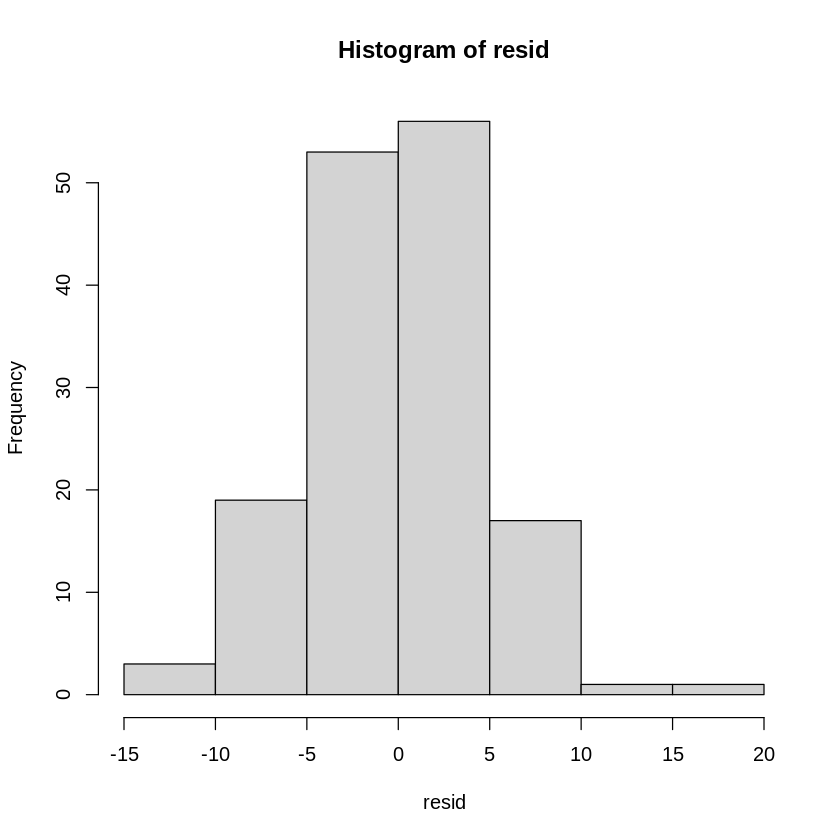

In [ ]:
resid <- residuals(model)
hist(resid)


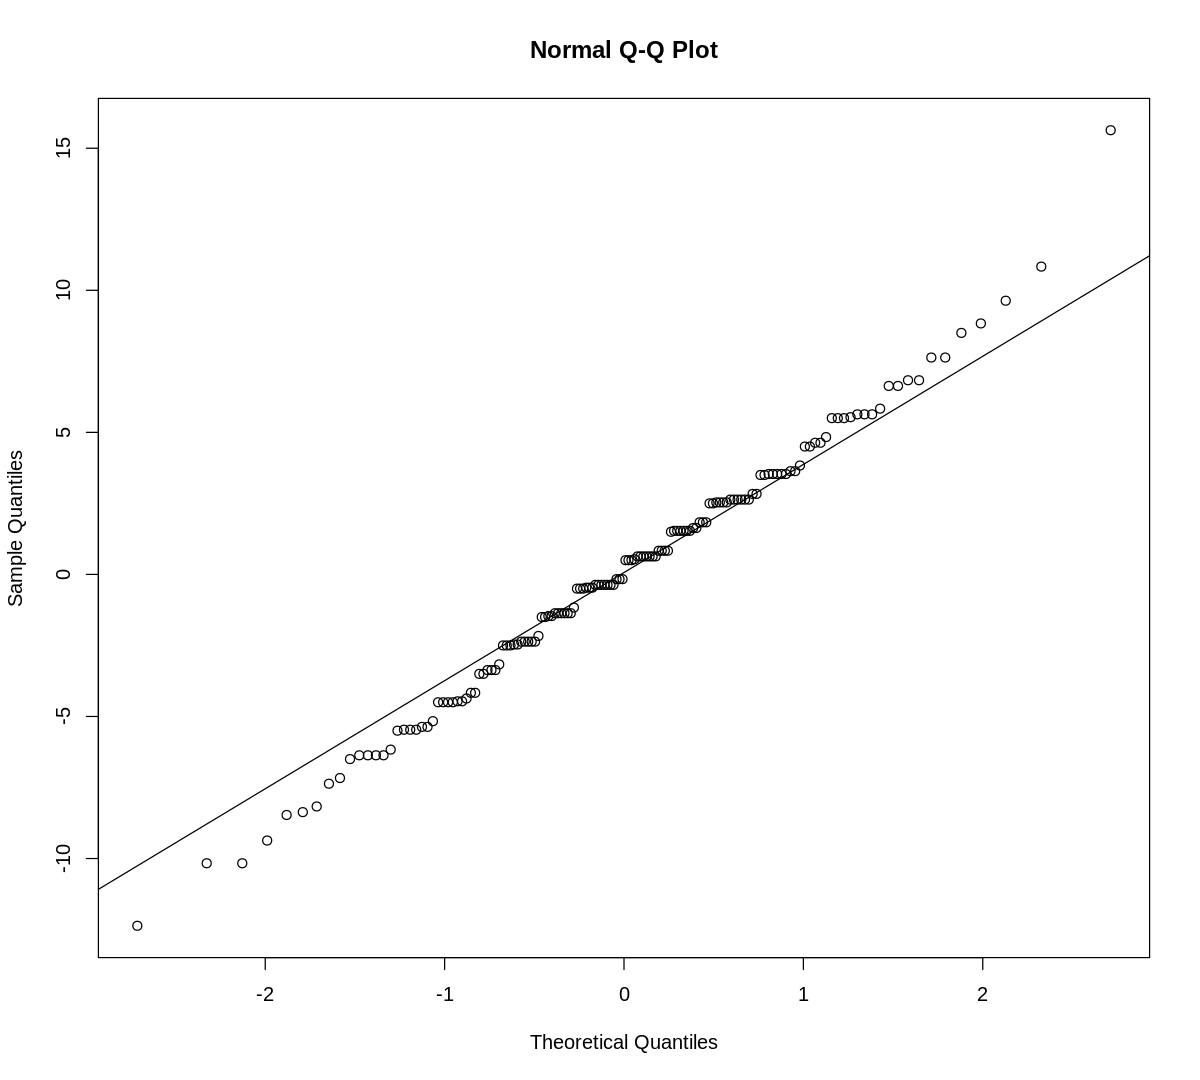

In [93]:
options(repr.plot.width = 10, repr.plot.height = 9)
qqnorm(resid)
qqline(resid)


It seems that the distribution of residuals in the model  may not be perfectly normal, but it is close enough to normality. The left-skewness of the histogram and the approximately linear QQ plot suggest that there may be some deviation from normality, but it is not severe enough to be a major concern for analysis.

 
  

# Question 9:

### Does the model you created for the **“SkullsComplete.csv”** data violate the homogeneity assumption?


In [ ]:
install.packages("car")
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData



In [ ]:
skulls3$epoch <- factor(skulls3$epoch)
leveneTest(skulls3$mb, skulls3$epoch, center = median)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,4,1.03666,0.3904702
,145,NA,NA


# Question 10:

### The data **“salary.csv”** shows the salary of different high-level job positions.

### Use polynomial contrasts to determine which type of trends are most appropriate to describe this data. i.e., specify which trend types are significant.

In [ ]:
sawdust <- read.csv("salary.csv")
library(plyr)
library(ggplot2)
options(repr.plot.width = 7, repr.plot.height = 5)


plotData <- ddply(sawdust, c("Position"), summarise,
                  n = length(Salary),
                  Mean = mean(Salary),
                  df = n - 1,
                  alpha = 0.05,
                  t_crit = qt(alpha/2, df = df, lower.tail = FALSE),
                  se = sd(Salary) / sqrt(n),
                  MOE = se * t_crit
)

plotData

Position,n,Mean,df,alpha,t_crit,se,MOE
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Business Analyst,13,45218.38,12,0.05,2.178813,4267.971,9299.110
C-level,13,365487.69,12,0.05,2.178813,26351.874,57415.801
CEO,13,494757.00,12,0.05,2.178813,26691.328,58155.407
Country Manager,13,101364.77,12,0.05,2.178813,13840.781,30156.472
Junior Consultant,13,47980.38,12,0.05,2.178813,2538.181,5530.221
Manager,13,84030.54,12,0.05,2.178813,2550.279,5556.580
Partner,13,202769.77,12,0.05,2.178813,13096.561,28534.955
Region Manager,13,139134.85,12,0.05,2.178813,14921.923,32512.077
Senior Consultant,13,56339.38,12,0.05,2.178813,2718.864,5923.897


In [83]:
# Load the data set
salary_data <- read.csv("salary.csv")

# Perform polynomial contrasts
salary_data$Level_poly <- salary_data$Level^2

fit <- lm(Salary ~ poly(Level, 2, raw = TRUE), data = salary_data)

# View the results
summary(fit)



Call:
lm(formula = Salary ~ poly(Level, 2, raw = TRUE), data = salary_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-188854  -27731    -290   18175  210338 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  78838.1    19401.4   4.064 8.41e-05 ***
poly(Level, 2, raw = TRUE)1 -31138.2     8102.9  -3.843 0.000191 ***
poly(Level, 2, raw = TRUE)2   7163.9      717.9   9.979  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 59480 on 127 degrees of freedom
Multiple R-squared:  0.8613,	Adjusted R-squared:  0.8591 
F-statistic: 394.2 on 2 and 127 DF,  p-value: < 2.2e-16


Both polynomial contrasts are significant, as indicated by their t-values and p-values. The adjusted R-squared value is 0.8591. The F-stat is significant at p-value < 2.2e-16, indicating that the model is a good fit for the data.

Therefore, the results suggest that a quadratic trend is most appropriate to describe the data.

# Question 11:

### Write out the simplest polynomial equation/model that **best** describes the trend seen in the **salary.csv** data.


$$Salary = 78838.1 - 31138.2 (Level) + 7163.9(Level)^2$$

# Question 12:

### Plot the equation from the previous question as a line on top of the observed values.

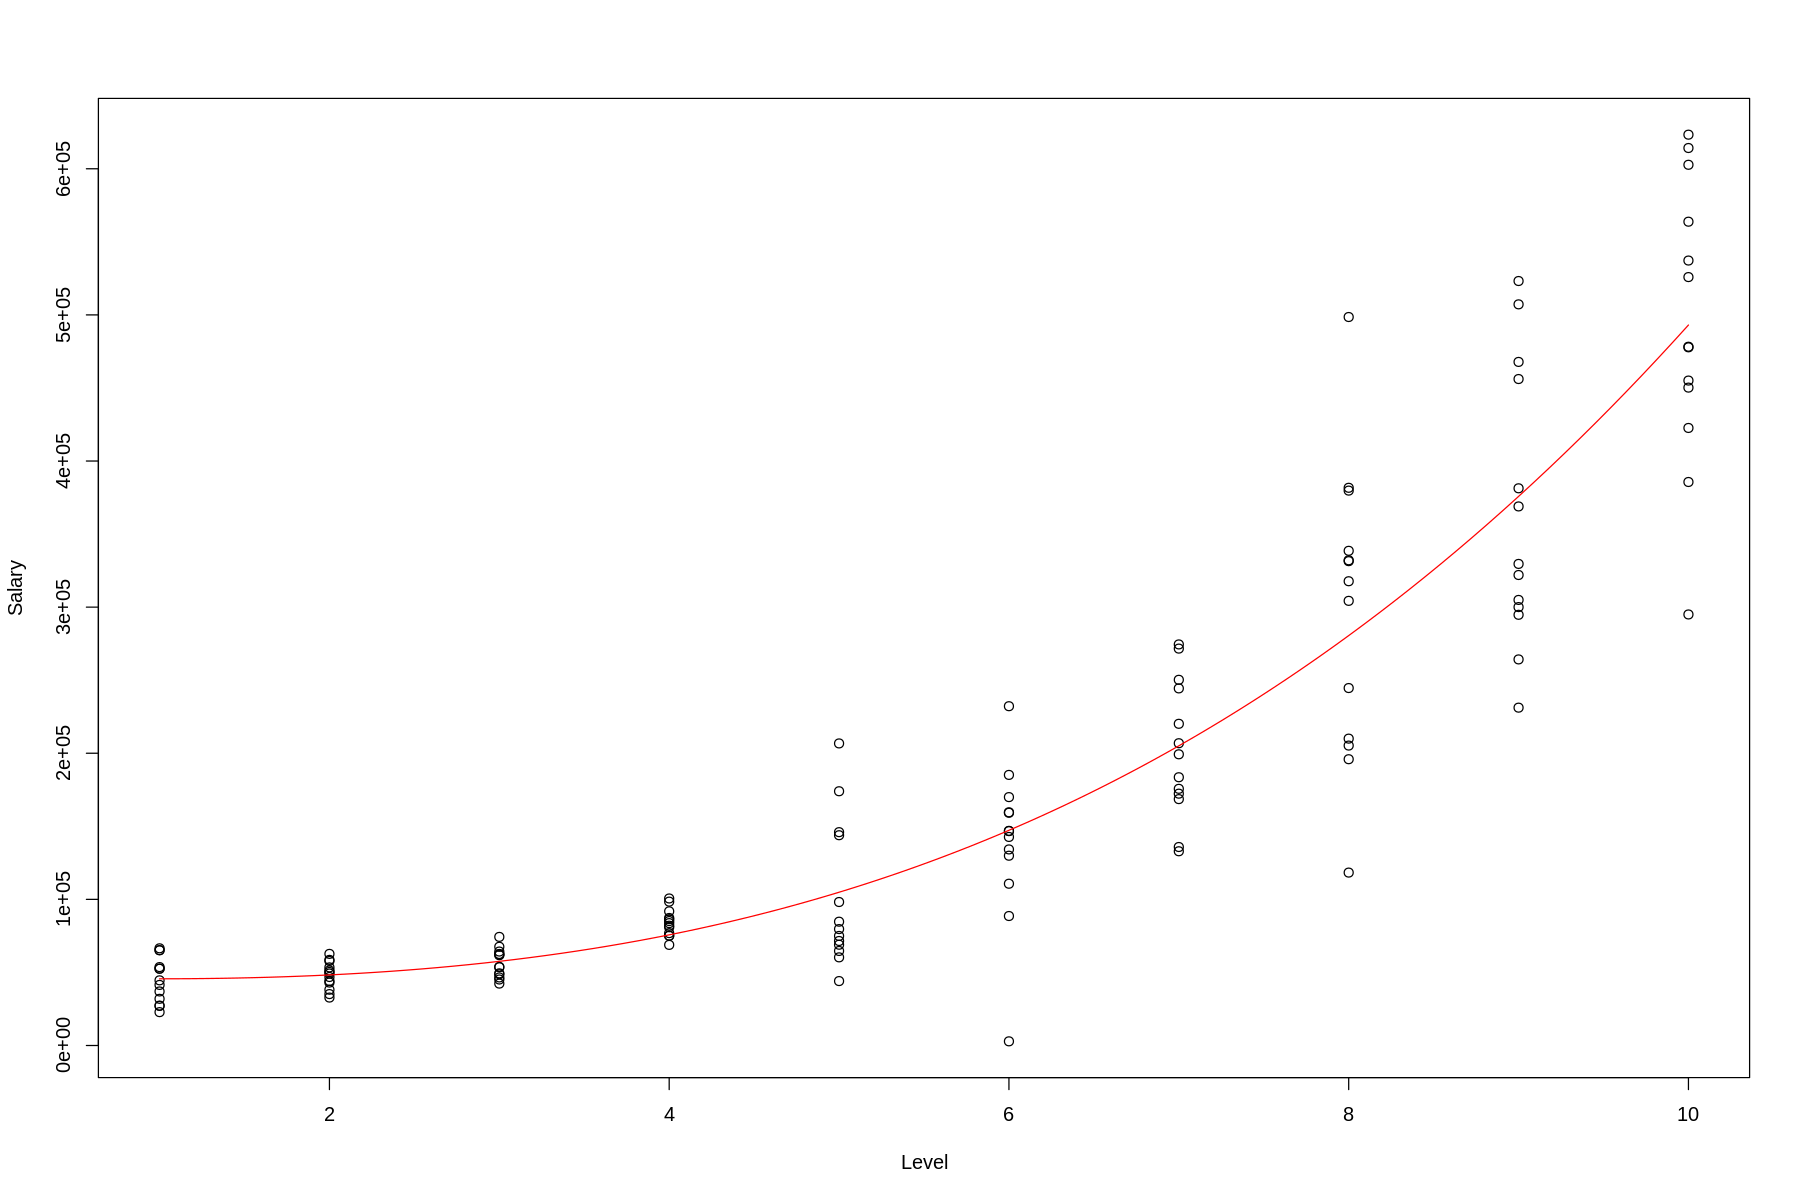

In [91]:
# Create a sequence of values over which to plot the line
x_seq <- seq(min(salary_data$Level), max(salary_data$Level), length.out = 100)

# Generate predicted values from the model at each point in the sequence
y_pred <- predict(model, newdata = data.frame(Level = x_seq))

# Plot the observed values as points and the predicted values as a line
options(repr.plot.width = 15, repr.plot.height = 10)
plot(salary_data$Level, salary_data$Salary, xlab = "Level", ylab = "Salary")
lines(x_seq, y_pred, col = "red")
